<a href="https://colab.research.google.com/github/shasha2408/Time-Series-Classification/blob/main/FordA_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# __Purpose of Analysis__
Analysing the characteristics of normal/abnormal state of the engine over time with the main data of the automatic system obtained from the sensor, the goal is to automatically detect the presence of a specific issue with the engine. 

# __Process definition and features__
 It is an automobile system, and it measures various factors ( noise, pressure, vibration, temperature.) with 500 sensors around it that can be related to the (normal / abnormal) state of the engine, which is a sub‑system of the vehicle.


# __Data collection method__


-  __Manufacturing field__ : Car operation system



 
-   **Manufacturing process name**: This is a kind of system operation data because it is composed of  measurement data collected from 500 sensors related to it to determine whether the sub‑system (engine) in the  vehicle operating system is abnormal or normal.
- **Collection equipment**:  In‑vehicle measurement sensor.
-   **Data source** : It is an open data set provided by Ford Classification Challenge, a machine learning contest hosted by Ford, USA, and anyone can access it from [http://www.timeseriesclassification.com/description.php?Dataset=FordA](http://www.timeseriesclassification.com/description.php?Dataset=FordA)






# __Data Dictionary__
A total of 4,921 time series structures, consisting of 3,601 training and 1,320 tests, and data for learning and testing are provided in separate files.


```
 Data Description
```
              classification | explanation**
        ---------------------|------------------
        Training data        |   3,601 units
        Test data            |   1,320 units


``` 
Number of columns: 501 pcs

               division      | designation                         | Data type
        ---------------------|------------------------------------
        Independent variable |  Sensor 1~500 (total 500)           | float64
        Dependent variable   |  normal/Abnormal Class (1 in total) | int64
                                (Class: 1 or ‑1 as normal/abnormal)
        Time                 |   time                              | object
           

 





# **Classification Algorithms using Machine Learning**



1.   Support Vector Machine
2.   Prinicipal Component Analysis & Random forest(PCA)
3.   AutoEncoder
4.   Long Short Term Memory(LSTM) (https://github.com/mnorayr/ford/blob/master/FordA.ipynb)


### __1. Support Vector Machine__
The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative SVM finds an optimal hyperplane which helps in classifying new data points.<br>
This SVC is performed in the following process :
-    Generate hyperplanes which segregates the classes in the best way  .<br>
-    Select the right hyperplane with the maximum segregation from the<br> either nearest data .
-    Radial Basis Function Kernel : -The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. `RBF` can map an input space in infinite dimensional space.
-    gamma : - gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value.<br>

###__2. Prinicipal Component Analysis__

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.<br>
The steps to perform PCA are the following:


*   Standardize the data.
*   Compute the covariance matrix of the features from the dataset.
*   Perform eigendecompositon on the covariance matrix 
*   Order the eigenvectors in decreasing order based on the magnitude of their coreenponding values.<br>

Applying PCA on high dimensional data , we get the data with lower dimension which is used as the input to other classification algorithim.

### __3. AutoEncoder__

Autoencoders (AE) are a family of neural networks for which the input is the same as the outpu*. They work by compressing the input into a latent-space representation, and then reconstructing the output from this representation.
An autoencoder consists of 3 components: encoder, code and decoder. The encoder compresses the input and produces the code, the decoder then reconstructs the input only using this code.<br>

If the error (reconstruction error) for the new data point is above some threshold, we label the example as an anomaly
>#### __Anomaly Detection__<br>
   Here are the basic steps to Anomaly Detection using an Autoencoder:
1. Train an Autoencoder on normal data (no anomalies List item
2. Take a new data point and try to reconstruct it using the Autoencoder.
3. If the error (reconstruction error) for the new data point is above some threshold, we label the data point as an anomaly.  

###4. __Long Short Term Memory__

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.<br>
An LSTM layer consists of a set of recurrently connected blocks, known as memory blocks. These blocks can be thought of as a differentiable version of the memory chips in a digital computer. Each one contains one or more recurrently connected memory cells and three multiplicative units – the `input`, `output` and `forget gates` – that provide continuous analogues of write, read and reset operations for the cells. … The net can only interact with the cells via the gates.















# __Importing Libraries and Data__


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from tensorflow.keras import layers, losses
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from keras.layers import Input, Dense
from sklearn.metrics import classification_report 
import warnings
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import joblib
pd.plotting.register_matplotlib_converters() 
from sklearn.metrics import roc_auc_score, roc_curve
np.random.seed(0)

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/DATA/FordA_TRAIN.csv')
test_set = pd.read_csv('/content/drive/MyDrive/DATA/FordA_TEST..csv')


## **Data preprocessing**


#### **Visualization : Check Data Imbalance**

[Text(0, 0, 'Abnormal'), Text(0, 0, 'Normal')]

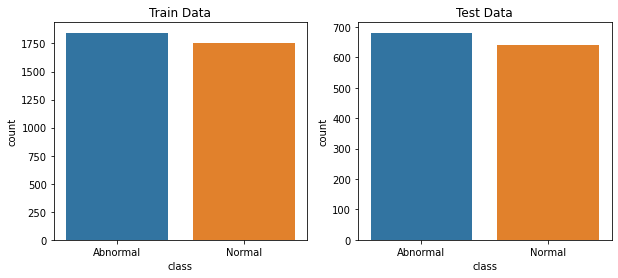

In [ ]:
f,ax=plt.subplots(1,2, figsize=(10,4))
g=sns.countplot('class', data = train_set, ax =ax[0])
g.set_title('Train Data')
g.set_xticklabels(['Abnormal','Normal'])
h=sns.countplot('class', data = test_set , ax=ax[1])
h.set_title('Test Data')
h.set_xticklabels(['Abnormal','Normal'])

#### **Data Info**

In [ ]:
def dataset_stats(train,test):
 
 # information of train and test set

  train.info()
  test.info()
  return 

#### **Train_test_split**

In [ ]:
def train_test_split(train,test):

  # spliting the train and test data in inputs and outputs. 

    x_train = train.iloc[:,1:]
    y_train = train.iloc[:,0]
    x_test = test.iloc[:,1:]
    y_test = test.iloc[:,0]
    print("x_train Shape :: ", x_train.shape)
    print("y_train Shape :: ", y_train.shape)
    print("x_test Shape :: ", x_test.shape)
    print("y_test Shape :: ", y_test.shape)
   
    return  x_train,x_test,y_train,y_test


#### __Data Scaling__.

In [ ]:
def data_scaling(x_train,x_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled  = scaler.fit_transform(x_test)
  return x_train_scaled,x_test_scaled

#### __Model_SVM__

In [ ]:
def Svm_classifier(x_train,y_train ):
    from sklearn import svm
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    return clf

### __Evaluation__.

In [ ]:
def evaluation(y_test,predictions):
  
  acc_test = accuracy_score(y_test, predictions)
  print('Test Accuracy: %.2f' % acc_test)
  print(classification_report(y_test, predictions)),
  cm=metrics.confusion_matrix(y_test,predictions)
  ax= plt.figure(figsize=(8,4))
  ax= plt.subplot()
  ax.set_xlabel('Predicted class');ax.set_ylabel('True class'); 
  ax.set_title('Confusion Matrix for SVM'); 
  sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
  ax.xaxis.set_ticklabels(['Normal', 'Abnormal']); ax.yaxis.set_ticklabels(['Normal', 'Abnormal']);
  plt.show()
  return
  

### __cross validation__

In [ ]:
def cross_valid(clf, x_train_scaled,y_train):
  from sklearn.model_selection import cross_validate
  scores = cross_validate(clf,x_train_scaled,y_train, cv=5, scoring=['accuracy'], return_train_score=True)
  print('Train accuracy: ', scores['train_accuracy'])
  print('Test accuracy: ', scores['test_accuracy'])
  return


## __Classification Using support Vector machine__


In [ ]:
def TS_SVC(train,test):

   # description of datasets

   dataset_stats(train_set,test_set)

   # Splitting training adn test into input and output

   x_train,x_test,y_train,y_test = train_test_split(train,test)

   # data scaling using Standard scaler

   x_train_scaled,x_test_scaled = data_scaling(x_train,x_test)

   # model training with train data and lebels

   trained_model = Svm_classifier(x_train,y_train)
   
   # Evaluation of mdoel performance on test data

   print("Trained model :: ", trained_model)
   predictions = trained_model.predict(x_test_scaled)
   evaluation(y_test,predictions)

   # Cross valdition
   scores = cross_valid(trained_model, x_train_scaled,y_train)
   return 
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, class to Sensor500
dtypes: float64(501)
memory usage: 13.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Columns: 501 entries, class to Sensor500
dtypes: float64(501)
memory usage: 5.0 MB
x_train Shape ::  (3601, 500)
y_train Shape ::  (3601,)
x_test Shape ::  (1320, 500)
y_test Shape ::  (1320,)
Trained model ::  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Test Accuracy: 0.83
              precision    recall  f1-score   support

        -1.0       0.83      0.86      0.84       681
         1.0       0.84      0.81      0.82       639

    accuracy                           0.83      1320
   macro avg       0.83      0.83      0.83      1320
weighted avg   

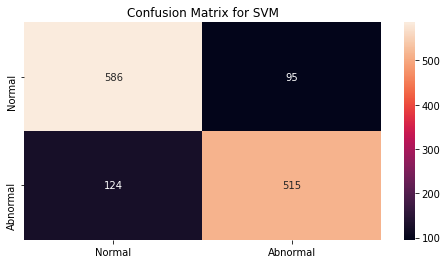

Train accuracy:  [0.93958333 0.9389101  0.94168691 0.93682749 0.9392572 ]
Test accuracy:  [0.81692094 0.83333333 0.79305556 0.83055556 0.78611111]


In [ ]:
TS_SVC(train_set,test_set)

## *__Classification Using PCA & Random Forest__*

#### __Calculating Eigenvectors and eigenvalues of Cov matirx__

In [ ]:
def eigenvec_eigenval(data):
  # caslculating mean vector of training datatset

  mean_vec = np.mean(data, axis=0)

  # covariance matrix

  cov_mat = np.cov(data.T)

  eig_vals, eig_vecs = np.linalg.eig(cov_mat)

  # Create a list of (eigenvalue, eigenvector) tuples
  eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

  # Sort the eigenvalue, eigenvector pair from high to low

  eig_pairs.sort(key = lambda x: x[0], reverse= True)

  # Calculation of Explained Variance from the eigenvalues

  tot = sum(eig_vals)

  # Individual explained variance

  var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

  cum_var_exp = np.cumsum(var_exp)  # Cumulative explained variance 

  # Find the eigenvector beyond which 95% of the data is explained
  return cum_var_exp



In [ ]:
def plot_cum_var_exp(cum_var_exp):
  sns.set(style='whitegrid')
  plt.plot(cum_var_exp)
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance')
  display(plt.show())
  return

In [ ]:
def Prin_components(cum_var_exp):
  p = [ n for n,i in enumerate(cum_var_exp) if i>95 ][0]
  print('no.of principal components', p)
  return p

#### __Reducing the train and test dimension to Principal components__

In [ ]:
def pca_data(x_train_scaled,x_test_scaled,p):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = p)
  pca.fit(x_train_scaled)
  x_train_pca= pca.transform(x_train_scaled)
  pca.fit(x_test_scaled)
  x_test_pca = pca.transform(x_test_scaled)
  print(x_train_pca.shape)
  print(x_test_pca.shape)
  return x_train_pca,x_test_pca,p

#### __Model training and evaluation__

In [ ]:
def RandF_clf(x_train_pca,y_train):
  from sklearn.ensemble import RandomForestClassifier
  Rf = RandomForestClassifier(random_state=1)
  Rf.fit(x_train_pca,y_train)
  return Rf

### __Crossvalidation and Finding the best parameter using GridSearch__

In [ ]:
 def GRid_search(x_train_pca,y_train):
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import RandomForestClassifier
  Rfc = RandomForestClassifier()
  scores = cross_validate(Rfc, x_train_pca,y_train, cv=5, scoring=['accuracy'], return_train_score=True)
  param_grid = { 'n_estimators': [200, 500],'max_depth' : [6,7,8,9,10]}
  CV_rfc = GridSearchCV(Rfc, param_grid=param_grid, cv= 5)
  final_model = CV_rfc.fit(x_train_pca, y_train)
  CV_rfc.best_params_
  CV_rfc.best_score_
  print('Train accuracy: ', scores['train_accuracy'])
  print('Test accuracy: ', scores['test_accuracy'])
  return final_model

### __Model__

In [ ]:
def TS_RandF(train,test):
  # description of datasets

   dataset_stats(train_set,test_set)

   # Splitting training adn test into input and output

   x_train,x_test,y_train,y_test = train_test_split(train,test)

   # data scaling using Standard scaler

   x_train_scaled,x_test_scaled = data_scaling(x_train,x_test)

   # Find the eigenvector beyond which 95% of the data is explained
   
   cum_var_exp = eigenvec_eigenval(x_train_scaled)
   

   plot_cum_var_exp(cum_var_exp)

   p = Prin_components(cum_var_exp)


   # dimwsion redeucction using pca for botn train and test data

   x_train_pca,x_test_pca,Principal_components = pca_data(x_train_scaled,x_test_scaled,p)
    
   # random Forest classifier after  dimenssion reduction using pca

   trained_model = RandF_clf(x_train_pca,y_train)
   print("Trained model :: ", trained_model)
   predictions = trained_model.predict(x_test_pca)
   evaluation(y_test,predictions)

   # Paramaters tunning for Rnadom forest classifier using GridsearchCV

   final_model = GRid_search(x_train_pca,y_train)
   print("Best parameters aFter Grid search", final_model.best_params_)
   print("Best training scores aFter Grid search",final_model.best_score_)
  

   print("Final Model :: ", final_model)
   final_model.fit(x_train_pca,y_train)
   Final_predictions = final_model.predict(x_test_pca)
   evaluation(y_test,Final_predictions)
   print("best Model after parameters tunning",final_model.best_params_)

   return

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, class to Sensor500
dtypes: float64(501)
memory usage: 13.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Columns: 501 entries, class to Sensor500
dtypes: float64(501)
memory usage: 5.0 MB
x_train Shape ::  (3601, 500)
y_train Shape ::  (3601,)
x_test Shape ::  (1320, 500)
y_test Shape ::  (1320,)


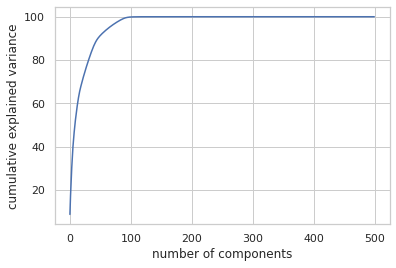

None

no.of principal components 65
(3601, 65)
(1320, 65)
Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Test Accuracy: 0.79
              precision    recall  f1-score   support

        -1.0       0.82      0.77      0.79       681
         1.0       0.77      0.83      0.80       639

    accuracy                           0.79      1320
   macro avg       0.80      0.80      0.79      1320
weighted avg       0.80      0.79      0.79      1320



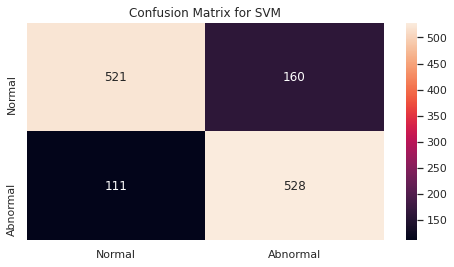

Train accuracy:  [1. 1. 1. 1. 1.]
Test accuracy:  [0.81137309 0.83055556 0.83194444 0.825      0.84583333]
Best parameters aFter Grid search {'max_depth': 10, 'n_estimators': 200}
Best training scores aFter Grid search 0.8242225304361227
Final Model ::  GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
             

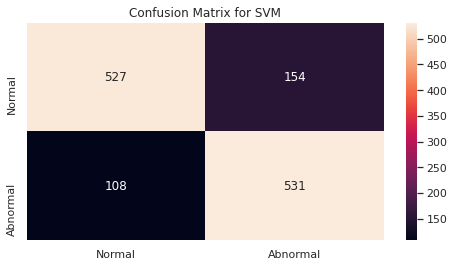

best Model after parameters tunning


In [ ]:
TS_RandF(train_set,test_set)

## *__AutoEncoder__*

### __Seprate the  training and testing data into Normal and Anomaly class__

In [ ]:
def scaler(x_train,x_test):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled  = scaler.fit_transform(x_test)
  return x_train_scaled,x_test_scaled
                                       

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(train_set,test_set)
 x_train_scaled,x_test_scaled  = scaler(x_train,x_test)
 

x_train Shape ::  (3601, 500)
y_train Shape ::  (3601,)
x_test Shape ::  (1320, 500)
y_test Shape ::  (1320,)


In [ ]:
  normal_train_data = pd.DataFrame(x_train_scaled)[y_train==1].values
  anomaly_train_data = pd.DataFrame(x_train_scaled)[y_train==-1].values
  normal_test_data = pd.DataFrame(x_test_scaled)[y_test==1].values
  anomaly_test_data = pd.DataFrame(x_test_scaled)[y_test==-1].values
  print('normal train data',normal_train_data.shape)
  print("anomaly train data",anomaly_train_data.shape)
  print("normal test data",normal_test_data.shape)
  print("anomaly test data",anomaly_test_data.shape)

normal train data (1755, 500)
anomaly train data (1846, 500)
normal test data (639, 500)
anomaly test data (681, 500)


##### __Normal_abnormal shape__

Text(0.5, 1.0, 'Anomaly data')

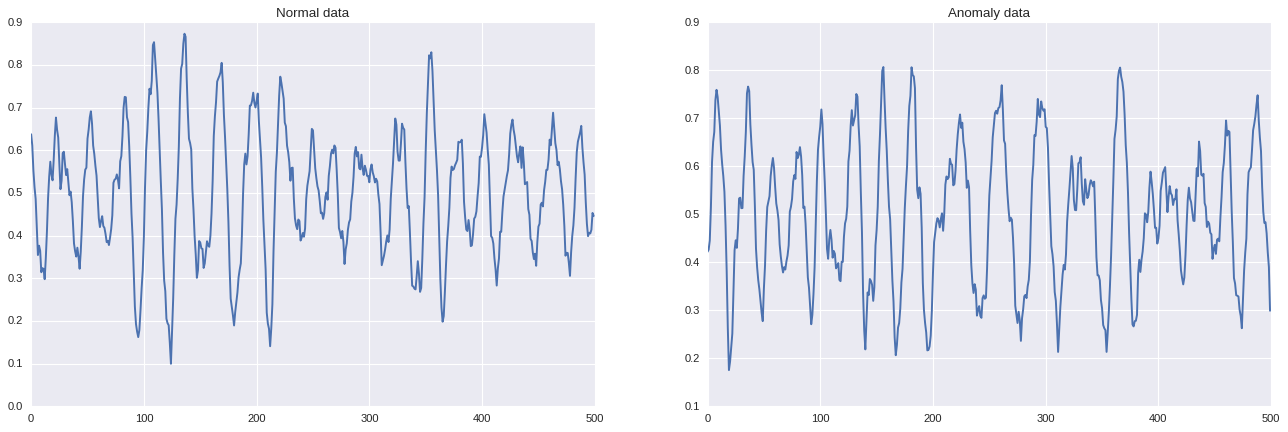

In [ ]:
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn')
plt.subplot(1,2,1)
plt.plot(normal_train_data[0])
plt.title('Normal data')
plt.subplot(1,2,2)
plt.plot(anomaly_train_data[0])
plt.title('Anomaly data')

##### __Changing the dimesions of Train and test data__

In [ ]:
x_train_normal = np.expand_dims(normal_train_data,-1)
x_train_anomaly = np.expand_dims(anomaly_train_data,-1)
x_test_normal = np.expand_dims(normal_test_data,-1)
x_test_anomaly = np.expand_dims(anomaly_test_data,-1)
test_data = np.expand_dims(x_test_scaled,-1)

  

In [ ]:
y_train[y_train==-1]=0
y_test[y_test==-1]=0

## __Autoencoder model Building and Training__

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train_normal.shape[1], x_train_normal.shape[2])),
        layers.Conv1D(
            filters=64, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
     
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
      layers.Conv1DTranspose(
            filters=64, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 250, 64)           512       
_________________________________________________________________
dropout (Dropout)            (None, 250, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 32)           14368     
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 250, 32)           7200      
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 500, 64)           14400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 500, 1)            4

In [ ]:
history = model.fit(
    x_train_normal,
    x_train_normal,
    epochs=50,
    batch_size=128,
    validation_split=0.05,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
14/14 [==============================] - 30s 28ms/step - loss: 0.1434 - val_loss: 0.0283
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0245 - val_loss: 0.0143
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0156 - val_loss: 0.0077
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0085 - val_loss: 0.0026
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 8/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 9/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 10/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 11/50
14/14

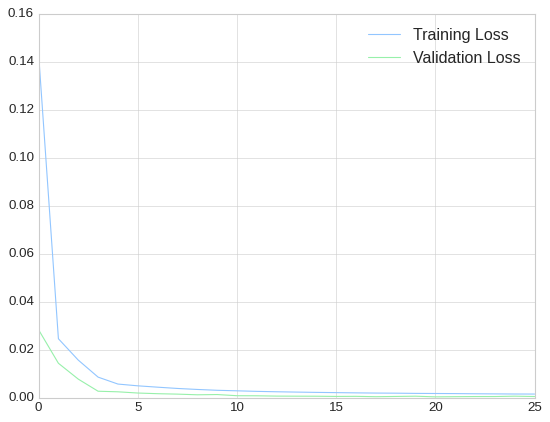

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

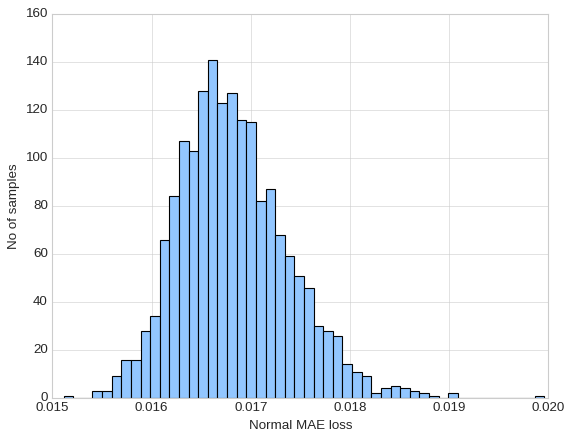

In [ ]:
normal_train_pred = model.predict(x_train_normal)
normal_Recons_loss = np.mean(np.abs(normal_train_pred - x_train_normal), axis=1)
plt.hist(normal_Recons_loss, bins=50)
plt.xlabel("Normal MAE loss")
plt.ylabel("No of samples")
plt.show()

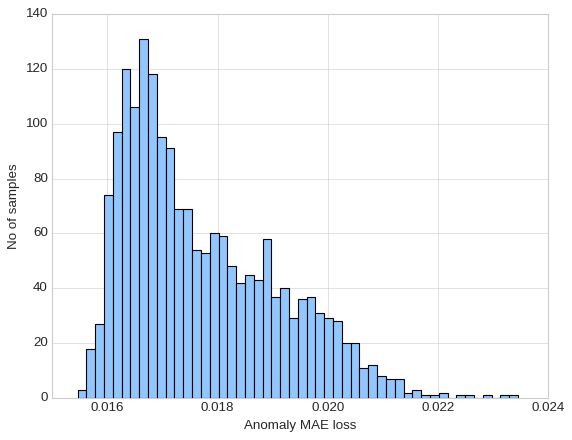

In [ ]:
Anomaly_train_pred = model.predict(x_train_anomaly)
Anomaly_Recons_loss = np.mean(np.abs(Anomaly_train_pred - x_train_anomaly), axis=1)
plt.hist(Anomaly_Recons_loss, bins=50)
plt.xlabel("Anomaly MAE loss")
plt.ylabel("No of samples")
plt.show()

### __Compare recontruction for normal  and anomaly data__<br>
 Checking how the first normal and abnormal sequence is learnt

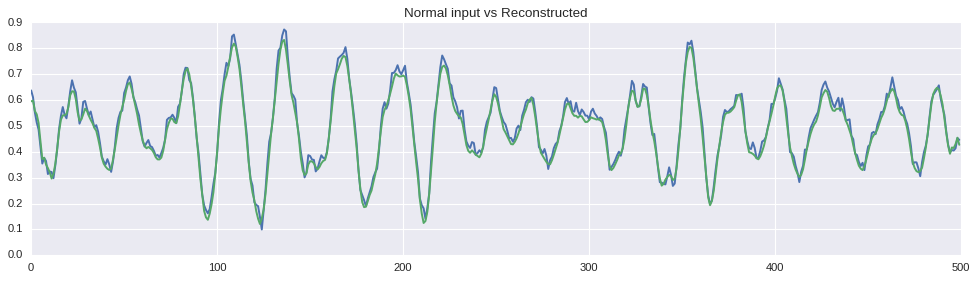

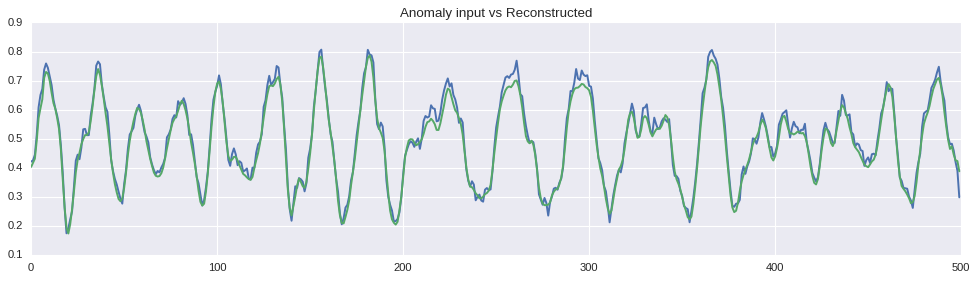

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(x_train_normal[0],label= 'input')
plt.plot(normal_train_pred[0])
plt.title('Normal input vs Reconstructed')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.plot(x_train_anomaly[0])
plt.plot(Anomaly_train_pred[0])
plt.title('Anomaly input vs Reconstructed')
plt.show()



### __Get reconstruction error threshold__.

In [ ]:
threshold = np.max(normal_Recons_loss)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.019960405541028493


### __Detect all the samples which are anomalies in Test data__

In [ ]:
test_pred = model.predict(test_data)
test_Recons_loss = np.mean(np.abs(test_pred-test_data), axis=1)
anomalies = test_Recons_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))
anomalies.shape
anomalies

Number of anomaly samples:  556
Indices of anomaly samples:  (array([   0,    1,    2,    6,    7,   10,   14,   16,   17,   18,   19,
         20,   22,   23,   28,   29,   30,   31,   32,   33,   35,   36,
         42,   45,   46,   47,   48,   50,   51,   55,   57,   58,   60,
         61,   66,   73,   74,   75,   80,   81,   84,   91,   92,   94,
         95,   99,  100,  103,  105,  106,  107,  109,  110,  113,  115,
        116,  117,  118,  121,  123,  125,  133,  135,  138,  139,  141,
        143,  145,  148,  151,  152,  153,  155,  156,  157,  159,  160,
        161,  162,  167,  168,  169,  171,  175,  176,  182,  190,  194,
        195,  196,  198,  200,  204,  206,  210,  215,  217,  219,  220,
        222,  224,  232,  235,  237,  242,  246,  250,  251,  253,  255,
        256,  258,  260,  261,  268,  270,  271,  272,  274,  276,  278,
        279,  280,  285,  286,  287,  290,  295,  299,  300,  302,  303,
        305,  308,  309,  311,  316,  320,  323,  324,  327,  

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
print(classification_report(y_test,anomalies )) 

              precision    recall  f1-score   support

         0.0       0.39      0.44      0.42       681
         1.0       0.31      0.27      0.29       639

    accuracy                           0.36      1320
   macro avg       0.35      0.36      0.35      1320
weighted avg       0.35      0.36      0.36      1320



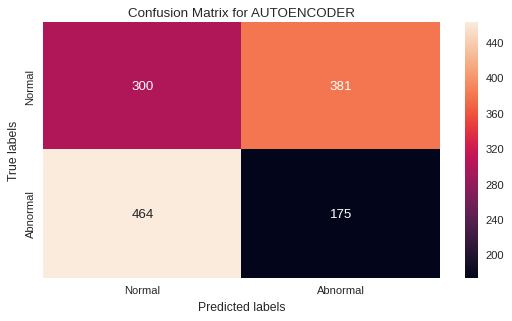

In [ ]:
cm=metrics.confusion_matrix(y_test,anomalies)
ax= plt.figure(figsize=(8,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for AUTOENCODER'); 
ax.xaxis.set_ticklabels(['Normal', 'Abnormal']); ax.yaxis.set_ticklabels(['Normal', 'Abnormal']);

#### __Conclusion__
 The Autoencoder can be used as an anomaly detection algorithm when we have an unbalanced dataset where we have a lot of good examples and only a few anomalies. Autoencoders are trained to minimize reconstruction error. When we train the autoencoders on normal data , we can hypothesize that the anomalies will have higher reconstruction errors than the normal data.<br>
 `FORD A` dataset is highly balanced it means that anomaly data is in higher percentage than normal data so the model is not able to diffrentiate between  the anomaly and normal data and tries to reconstruct both in same manner.

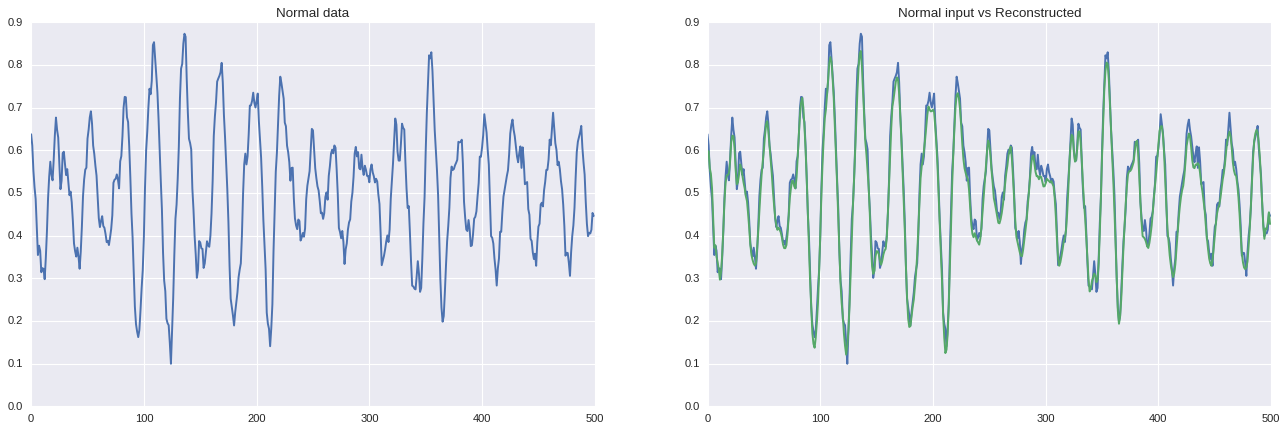

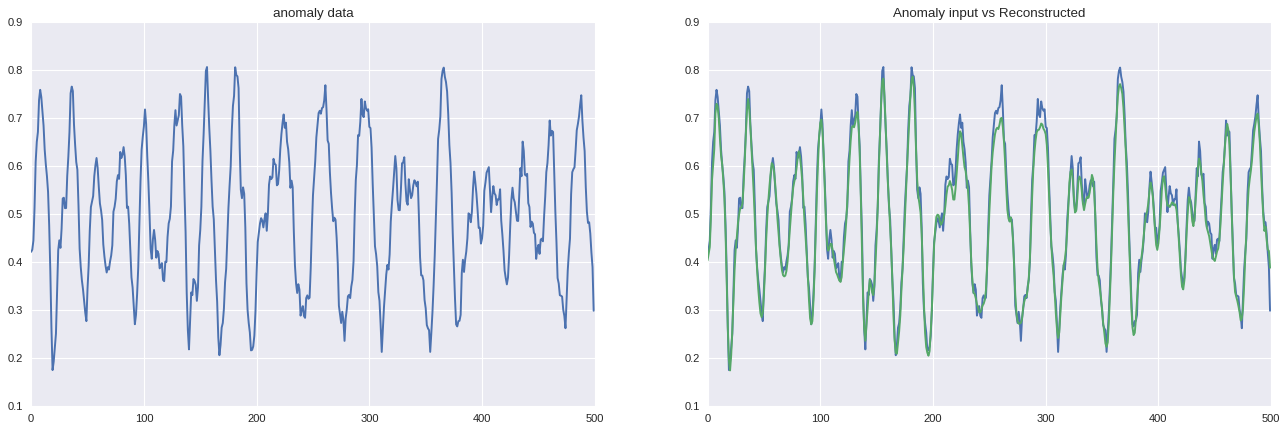

In [ ]:
#@title
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(normal_train_data[0])
plt.title('Normal data')
plt.subplot(1,2,2)
plt.plot(x_train_normal[0],label= 'input')
plt.plot(normal_train_pred[0])
plt.title('Normal input vs Reconstructed')
plt.show()
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(anomaly_train_data[0])
plt.title('anomaly data')
plt.subplot(1,2,2)
plt.plot(x_train_anomaly[0],label= 'input')
plt.plot(Anomaly_train_pred[0])
plt.title('Anomaly input vs Reconstructed')
plt.show()


## __PERFORMANCE EVALUATION__

<table><br>
<tr>
<th>ALGORITHMS</th>
<th>ACCURACY</th>
<th>RECALL</th>
<th>F1 SCORE</th>
<th>REMARKS</th>
</tr>
<tr>
<td>SUPPORT VECTOR MACHINE</td>
<td>84 </td>

---
<td>84</td>
<td>84</td>
<td>Supervised</td>
</tr>
<tr>
<td>PCA + RANDOM FOREST</td>
<td>  80 </td>
<td>80</td>
<td>80 </td>
<td>Supervised</td>
</tr>
<td>LSTM</td> 
<td>93</td>
<td>93</td>
<td>94</td>
<td>Supervised</td>
</tr>
<td> AUTOENCODER</td>
<td>50</td>
<td>48</td>
<td>34</td>
<td>Semi-Supervised</td>
</tr>

